In [33]:
import pandas as pd
import sqlite3 as lite
from NNClassifier import TrainedClassifier
import os.path
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Load the trained classifier:

In [2]:
training_data = 'NNClassifier/tmp/therapeutic/training_data.npz'
trained_model = 'NNClassifier/tmp/therapeutic'

In [3]:
tc = TrainedClassifier(training_data,trained_model)

------------------------------
loading the translator
------------------------------
------------------------------
loading the args
------------------------------
------------------------------
initialization
------------------------------
------------------------------
loading the model
------------------------------


Next, lets' load our database of data scraped from google (which we plan to use to classify drugs).

In [4]:
#local database:
database = 'googDrugData.db'

In [5]:
with lite.connect(database) as con:
    df_goog = pd.read_sql('select Generic_Name, Drug_Class_Data_clean, url from goog_drug_class_data;',con)
#Do a bit of cleaning:
df_goog['Generic_Name'] = df_goog['Generic_Name'].apply(lambda x: x.strip())
df_goog

,Generic_Name,Drug_Class_Data_clean,url
0,SULFACETAMIDE SODIUM,\n\n sulfa antibiotics\n \n\n,https://www.goodrx.com/sulfacetamide-sulfur
1,SULFACETAMIDE SODIUM,\n\n Other\n \n\n sulfa antibiotics\n \...,https://www.goodrx.com/sulfacetamide-sulfur
2,SULFACETAMIDE SODIUM,\n\n sulfa antibiotics\n \n\n,http://www.goodrx.com/sulfacetamide/images
3,SULFACETAMIDE SODIUM,\n\n Other\n \n\n sulfa antibiotics\n \...,http://www.goodrx.com/sulfacetamide/images
4,SULFACETAMIDE SODIUM,\n\n sulfa antibiotic / corticosteroid combin...,https://www.goodrx.com/sulfacetamide-prednisol...
5,SULFACETAMIDE SODIUM,\n\n Other\n \n\n sulfa antibiotic / cort...,https://www.goodrx.com/sulfacetamide-prednisol...
6,SULFACETAMIDE SODIUM,\n\n sulfa antibiotics\n \n\n,http://www.goodrx.com/klaron/images
7,SULFACETAMIDE SODIUM,\n\n Other\n \n\n sulfa antibiotics\n \...,http://www.goodrx.com/klaron/images
8,SULFACETAMIDE SODIUM,\n\n Sulfonamide Antibacterial [EPC]\n \n,http://www.medschat.com/NDC/61314-701
9,SULFACETAMIDE SODIUM,\n\n Sulfonamides [Chemical/Ingredient]\n \n,http://www.medschat.com/NDC/61314-701


Next, let's load the database of classified drugs, and check how accurate our classifier is:

In [6]:
if os.path.isfile('drug_uses.csv'):
    df_uses = pd.read_csv('drug_uses.csv',index_col=0)
else:
    df_uses = pd.read_csv('https://query.data.world/s/81zz5jv9bpf4n70eoaef1lvjw',index_col=0)
df_uses

,drugname_brand,drugname_generic,anatomical,therapeutic,pharmacologic,chemical,substance,name
0,8-MOP,METHOXSALEN,DERMATOLOGICALS,ANTIPSORIATICS,ANTIPSORIATICS FOR TOPICAL USE,PSORALENS FOR TOPICAL USE,METHOXSALEN,METHOXSALEN
1,8-MOP,METHOXSALEN,DERMATOLOGICALS,ANTIPSORIATICS,ANTIPSORIATICS FOR SYSTEMIC USE,PSORALENS FOR SYSTEMIC USE,METHOXSALEN,METHOXSALEN
2,OXSORALEN,METHOXSALEN,DERMATOLOGICALS,ANTIPSORIATICS,ANTIPSORIATICS FOR TOPICAL USE,PSORALENS FOR TOPICAL USE,METHOXSALEN,METHOXSALEN
3,OXSORALEN,METHOXSALEN,DERMATOLOGICALS,ANTIPSORIATICS,ANTIPSORIATICS FOR SYSTEMIC USE,PSORALENS FOR SYSTEMIC USE,METHOXSALEN,METHOXSALEN
4,ABILIFY,ARIPIPRAZOLE,NERVOUS SYSTEM,PSYCHOLEPTICS,ANTIPSYCHOTICS,OTHER ANTIPSYCHOTICS,ARIPIPRAZOLE,ARIPIPRAZOLE
5,ABILIFY,ARIPIPRAZOLE,NERVOUS SYSTEM,PSYCHOLEPTICS,ANTIPSYCHOTICS,OTHER ANTIPSYCHOTICS,ARIPIPRAZOLE,ARIPIPRAZOLE CAVOXIL
6,ABILIFY,ARIPIPRAZOLE,NERVOUS SYSTEM,PSYCHOLEPTICS,ANTIPSYCHOTICS,OTHER ANTIPSYCHOTICS,ARIPIPRAZOLE,ARIPIPRAZOLE LAUROXIL
7,ABILIFY,ARIPIPRAZOLE,NERVOUS SYSTEM,PSYCHOLEPTICS,ANTIPSYCHOTICS,OTHER ANTIPSYCHOTICS,ARIPIPRAZOLE,ARIPIPRAZOLE HYDRATE
8,ABILIFY DISCMELT,ARIPIPRAZOLE,NERVOUS SYSTEM,PSYCHOLEPTICS,ANTIPSYCHOTICS,OTHER ANTIPSYCHOTICS,ARIPIPRAZOLE,ARIPIPRAZOLE
9,ABILIFY DISCMELT,ARIPIPRAZOLE,NERVOUS SYSTEM,PSYCHOLEPTICS,ANTIPSYCHOTICS,OTHER ANTIPSYCHOTICS,ARIPIPRAZOLE,ARIPIPRAZOLE CAVOXIL


Correlate the two databases:

In [7]:
df = pd.merge(df_uses[['drugname_generic','anatomical','therapeutic','pharmacologic']]
                      ,df_goog,
              left_on='drugname_generic',
              right_on='Generic_Name',
              how='inner').drop('Generic_Name',1).drop_duplicates(keep='first').reset_index(drop=True)
df

,drugname_generic,anatomical,therapeutic,pharmacologic,Drug_Class_Data_clean,url
0,METHOXSALEN,DERMATOLOGICALS,ANTIPSORIATICS,ANTIPSORIATICS FOR TOPICAL USE,\n\n psoralens\n \n\n,https://www.goodrx.com/methoxsalen
1,METHOXSALEN,DERMATOLOGICALS,ANTIPSORIATICS,ANTIPSORIATICS FOR TOPICAL USE,\n\n Other\n \n\n psoralens\n \n\n\n\n\...,https://www.goodrx.com/methoxsalen
2,METHOXSALEN,DERMATOLOGICALS,ANTIPSORIATICS,ANTIPSORIATICS FOR TOPICAL USE,"\n\n Antipsoriatic\n \n ,\n \n Hypopigmentat...",https://www.ncbi.nlm.nih.gov/pubmedhealth/PMHT...
3,METHOXSALEN,DERMATOLOGICALS,ANTIPSORIATICS,ANTIPSORIATICS FOR TOPICAL USE,\n\n psoralens\n \n\n,http://www.goodrx.com/oxsoralen-ultra/what-is
4,METHOXSALEN,DERMATOLOGICALS,ANTIPSORIATICS,ANTIPSORIATICS FOR TOPICAL USE,\n\n Other\n \n\n psoralens\n \n\n\n\n\...,http://www.goodrx.com/oxsoralen-ultra/what-is
5,METHOXSALEN,DERMATOLOGICALS,ANTIPSORIATICS,ANTIPSORIATICS FOR TOPICAL USE,\n\n Photoabsorption [moa]\n \n\n,http://www.carebulletin.com/drug/m/methoxsalen...
6,METHOXSALEN,DERMATOLOGICALS,ANTIPSORIATICS,ANTIPSORIATICS FOR TOPICAL USE,\n\n photoactivated Radical Generator [epc]\n...,http://www.carebulletin.com/drug/m/methoxsalen...
7,METHOXSALEN,DERMATOLOGICALS,ANTIPSORIATICS,ANTIPSORIATICS FOR TOPICAL USE,\n\n photosensitizing Activity [pe]\n \n\n,http://www.carebulletin.com/drug/m/methoxsalen...
8,METHOXSALEN,DERMATOLOGICALS,ANTIPSORIATICS,ANTIPSORIATICS FOR TOPICAL USE,\n\n psoralen [epc]\n \n\n,http://www.carebulletin.com/drug/m/methoxsalen...
9,METHOXSALEN,DERMATOLOGICALS,ANTIPSORIATICS,ANTIPSORIATICS FOR TOPICAL USE,\n\n psoralens [chemical/ingredient]\n \n\n,http://www.carebulletin.com/drug/m/methoxsalen...


In [8]:
df_testing = df[['drugname_generic','anatomical',
                 'therapeutic','pharmacologic']].drop_duplicates(keep='first').reset_index(drop=True)
df_testing

,drugname_generic,anatomical,therapeutic,pharmacologic
0,METHOXSALEN,DERMATOLOGICALS,ANTIPSORIATICS,ANTIPSORIATICS FOR TOPICAL USE
1,METHOXSALEN,DERMATOLOGICALS,ANTIPSORIATICS,ANTIPSORIATICS FOR SYSTEMIC USE
2,ARIPIPRAZOLE,NERVOUS SYSTEM,PSYCHOLEPTICS,ANTIPSYCHOTICS
3,ISOTRETINOIN,DERMATOLOGICALS,ANTI-ACNE PREPARATIONS,ANTI-ACNE PREPARATIONS FOR TOPICAL USE
4,ISOTRETINOIN,DERMATOLOGICALS,ANTI-ACNE PREPARATIONS,ANTI-ACNE PREPARATIONS FOR SYSTEMIC USE
5,ACARBOSE,ALIMENTARY TRACT AND METABOLISM,DRUGS USED IN DIABETES,"BLOOD GLUCOSE LOWERING DRUGS, EXCL. INSULINS"
6,ZAFIRLUKAST,RESPIRATORY SYSTEM,DRUGS FOR OBSTRUCTIVE AIRWAY DISEASES,OTHER SYSTEMIC DRUGS FOR OBSTRUCTIVE AIRWAY DI...
7,ACETAZOLAMIDE,SENSORY ORGANS,OPHTHALMOLOGICALS,ANTIGLAUCOMA PREPARATIONS AND MIOTICS
8,ACETIC ACID,GENITO URINARY SYSTEM AND SEX HORMONES,GYNECOLOGICAL ANTIINFECTIVES AND ANTISEPTICS,"ANTIINFECTIVES AND ANTISEPTICS, EXCL. COMBINAT..."
9,ACETIC ACID,SENSORY ORGANS,OTOLOGICALS,ANTIINFECTIVES


Run the classifier:

In [22]:
df_testing['Therapeutic_Classifier_Guess'] = ''
df_testing['Therapeutic_Classifier_Prob'] = 0.
checked_drugs = dict()
for i,drugname in enumerate(df_testing['drugname_generic']):
    if drugname not in checked_drugs:
        urls = df[df['drugname_generic'] == drugname]['url']
        agg_probs = dict()
        j = 0.
        for url in urls:
            descriptors = df[(df['drugname_generic'] == drugname) & (df['url'] == url)]['Drug_Class_Data_clean']
            if len(descriptors) > 0:
                j += 1.
                cur_agg_probs = tc.confidence_classification_aggregate(descriptors)
                for key in cur_agg_probs.keys():
                    if key in agg_probs:
                        agg_probs[key] = ((j-1)*agg_probs[key] + cur_agg_probs[key])/j
                    else:
                        agg_probs[key] = cur_agg_probs[key]
            #print(drugname,tc.top_classification_aggregate(descriptors))
        top_guess = max(agg_probs, key=agg_probs.get)
        checked_drugs[drugname] = {'agg_probs':agg_probs,'top_guess':top_guess,'prob':agg_probs[top_guess]}
    df_testing['Therapeutic_Classifier_Guess'].iloc[i] = checked_drugs[drugname]['top_guess']
    df_testing['Therapeutic_Classifier_Prob'].iloc[i] = checked_drugs[drugname]['prob']
    print(drugname + " Correct: "+ df_testing['therapeutic'].iloc[i] + " Guessed: "+
          df_testing['Therapeutic_Classifier_Guess'].iloc[i]+ " Prob: "+str(agg_probs[top_guess]))
df_testing

//anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


METHOXSALEN Correct: ANTIPSORIATICS Guessed: ANTIPSORIATICS Prob: 0.555518802226
METHOXSALEN Correct: ANTIPSORIATICS Guessed: ANTIPSORIATICS Prob: 0.555518802226
ARIPIPRAZOLE Correct: PSYCHOLEPTICS Guessed: PSYCHOLEPTICS Prob: 0.81420448112
ISOTRETINOIN Correct: ANTI-ACNE PREPARATIONS Guessed: ANTI-ACNE PREPARATIONS Prob: 0.338846678846
ISOTRETINOIN Correct: ANTI-ACNE PREPARATIONS Guessed: ANTI-ACNE PREPARATIONS Prob: 0.338846678846
ACARBOSE Correct: DRUGS USED IN DIABETES Guessed: DRUGS USED IN DIABETES Prob: 0.262684272788
ZAFIRLUKAST Correct: DRUGS FOR OBSTRUCTIVE AIRWAY DISEASES Guessed: DRUGS FOR OBSTRUCTIVE AIRWAY DISEASES Prob: 0.186094681422
ACETAZOLAMIDE Correct: OPHTHALMOLOGICALS Guessed: ANTIEPILEPTICS Prob: 0.403323201921
ACETIC ACID Correct: GYNECOLOGICAL ANTIINFECTIVES AND ANTISEPTICS Guessed: OTOLOGICALS Prob: 0.220557268916
ACETIC ACID Correct: OTOLOGICALS Guessed: OTOLOGICALS Prob: 0.220557268916
ACETYLCYSTEINE Correct: COUGH AND COLD PREPARATIONS Guessed: COUGH AND CO

,drugname_generic,anatomical,therapeutic,pharmacologic,Therapeutic_Classifier_Guess,Therapeutic_Classifier_Prob,Therapeutic_Classifier_Probs
0,METHOXSALEN,DERMATOLOGICALS,ANTIPSORIATICS,ANTIPSORIATICS FOR TOPICAL USE,ANTIPSORIATICS,0.555519,0
1,METHOXSALEN,DERMATOLOGICALS,ANTIPSORIATICS,ANTIPSORIATICS FOR SYSTEMIC USE,ANTIPSORIATICS,0.555519,0
2,ARIPIPRAZOLE,NERVOUS SYSTEM,PSYCHOLEPTICS,ANTIPSYCHOTICS,PSYCHOLEPTICS,0.814204,0
3,ISOTRETINOIN,DERMATOLOGICALS,ANTI-ACNE PREPARATIONS,ANTI-ACNE PREPARATIONS FOR TOPICAL USE,ANTI-ACNE PREPARATIONS,0.338847,0
4,ISOTRETINOIN,DERMATOLOGICALS,ANTI-ACNE PREPARATIONS,ANTI-ACNE PREPARATIONS FOR SYSTEMIC USE,ANTI-ACNE PREPARATIONS,0.338847,0
5,ACARBOSE,ALIMENTARY TRACT AND METABOLISM,DRUGS USED IN DIABETES,"BLOOD GLUCOSE LOWERING DRUGS, EXCL. INSULINS",DRUGS USED IN DIABETES,0.262684,0
6,ZAFIRLUKAST,RESPIRATORY SYSTEM,DRUGS FOR OBSTRUCTIVE AIRWAY DISEASES,OTHER SYSTEMIC DRUGS FOR OBSTRUCTIVE AIRWAY DI...,DRUGS FOR OBSTRUCTIVE AIRWAY DISEASES,0.186095,0
7,ACETAZOLAMIDE,SENSORY ORGANS,OPHTHALMOLOGICALS,ANTIGLAUCOMA PREPARATIONS AND MIOTICS,ANTIEPILEPTICS,0.403323,0
8,ACETIC ACID,GENITO URINARY SYSTEM AND SEX HORMONES,GYNECOLOGICAL ANTIINFECTIVES AND ANTISEPTICS,"ANTIINFECTIVES AND ANTISEPTICS, EXCL. COMBINAT...",OTOLOGICALS,0.220557,0
9,ACETIC ACID,SENSORY ORGANS,OTOLOGICALS,ANTIINFECTIVES,OTOLOGICALS,0.220557,0


Check the accuracy, how often do we get one of the possible correct classifications?

In [23]:
correct = dict()
for drug in set(df_testing['drugname_generic']):
    df_tmp = df_testing[df_testing['drugname_generic']==drug]
    correct[drug] = (df_tmp['therapeutic'] == df_tmp['Therapeutic_Classifier_Guess']).sum()>0

In [27]:
mask = pd.Series([correct[drug] for drug in df_testing['drugname_generic']])

In [24]:
total_correct = 0
for drug,cor in correct.items():
    total_correct += cor
accuracy = total_correct/len(correct)
print('Accuracy: %f'%accuracy)

Accuracy: 0.695187


In [25]:
mask = (df_testing['therapeutic'] == df_testing['Therapeutic_Classifier_Guess'])
accuracy = mask.sum()/mask.shape
print('Accuracy: %f'%accuracy)

Accuracy: 0.528628


In [26]:
num_entries = dict()
for drug in df_testing[mask == False]['drugname_generic']:
    if drug not in num_entries:
        num_entries[drug] = (df_testing['drugname_generic'] == drug).sum()
total_entries = 0
for drug,num in num_entries.items():
    total_entries += num
total_entries/len(num_entries)

1.8043478260869565

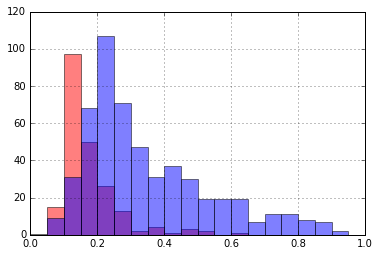

In [42]:
df_testing[(mask == False)]['Therapeutic_Classifier_Prob'].hist(color = 'red',alpha = 0.5, bins = np.arange(0,1,.05))
df_testing[(mask == True)]['Therapeutic_Classifier_Prob'].hist(color = 'blue',alpha = 0.5, bins = np.arange(0,1,.05))
plt.show()

In [44]:
df_testing[(mask == False) & (df_testing['Therapeutic_Classifier_Prob']>.15)]

,drugname_generic,anatomical,therapeutic,pharmacologic,Therapeutic_Classifier_Guess,Therapeutic_Classifier_Prob,Therapeutic_Classifier_Probs
7,ACETAZOLAMIDE,SENSORY ORGANS,OPHTHALMOLOGICALS,ANTIGLAUCOMA PREPARATIONS AND MIOTICS,ANTIEPILEPTICS,0.403323,0
13,ACITRETIN,DERMATOLOGICALS,ANTIPSORIATICS,ANTIPSORIATICS FOR SYSTEMIC USE,ANTI-ACNE PREPARATIONS,0.232684,0
23,RIOCIGUAT,CARDIOVASCULAR SYSTEM,ANTIHYPERTENSIVES,OTHER ANTIHYPERTENSIVES,DIURETICS,0.295442,0
44,ALBENDAZOLE,"ANTIPARASITIC PRODUCTS, INSECTICIDES AND REPEL...",ANTHELMINTICS,ANTINEMATODAL AGENTS,ANTINEOPLASTIC AGENTS,0.168159,0
48,SALICYLIC ACID,DERMATOLOGICALS,ANTIFUNGALS FOR DERMATOLOGICAL USE,ANTIFUNGALS FOR TOPICAL USE,UROLOGICALS,0.248634,0
49,SALICYLIC ACID,SENSORY ORGANS,OPHTHALMOLOGICALS,ANTIINFLAMMATORY AGENTS,UROLOGICALS,0.248634,0
55,ALPROSTADIL,CARDIOVASCULAR SYSTEM,CARDIAC THERAPY,OTHER CARDIAC PREPARATIONS,DIURETICS,0.219290,0
56,ALPROSTADIL,GENITO URINARY SYSTEM AND SEX HORMONES,UROLOGICALS,UROLOGICALS,DIURETICS,0.219290,0
66,AMINOPHYLLINE,RESPIRATORY SYSTEM,DRUGS FOR OBSTRUCTIVE AIRWAY DISEASES,OTHER SYSTEMIC DRUGS FOR OBSTRUCTIVE AIRWAY DI...,ANTINEOPLASTIC AGENTS,0.155360,0
74,AMYL NITRITE,VARIOUS,ALL OTHER THERAPEUTIC PRODUCTS,ALL OTHER THERAPEUTIC PRODUCTS,UROLOGICALS,0.485699,0
